# Generate Data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Set seed untuk reproduksibilitas
np.random.seed(42)

# Jumlah mahasiswa dalam sampel
n = 100

# Membuat data waktu scroll TikTok (dalam menit per hari)
waktu_tiktok = np.random.normal(120, 45, n)
waktu_tiktok = np.clip(waktu_tiktok, 0, 300)  # Membatasi nilai minimum 0 dan maksimum 300 menit

# Membuat IPK dengan korelasi negatif terhadap waktu TikTok
korelasi_ipk = -0.65  # Korelasi negatif yang cukup kuat
noise_ipk = np.random.normal(0, 0.5, n)
ipk_base = 4 - (waktu_tiktok / 300 * 2)  # IPK max 4.0
ipk = ipk_base + noise_ipk
ipk = np.clip(ipk, 1.0, 4.0)  # IPK antara 1.0 dan 4.0

# Membuat persentase tugas selesai dengan korelasi negatif terhadap waktu TikTok
korelasi_tugas = -0.7  # Korelasi negatif yang kuat
noise_tugas = np.random.normal(0, 10, n)
tugas_base = 100 - (waktu_tiktok / 300 * 60)  # Persentase tugas selesai
tugas = tugas_base + noise_tugas
tugas = np.clip(tugas, 0, 100)  # Persentase antara 0 dan 100

# Membuat variabel kesulitan tidur (kategorik) yang dipengaruhi oleh waktu TikTok
kesulitan_tidur = []
for wt in waktu_tiktok:
    # Probabilitas untuk setiap kategori berdasarkan waktu TikTok
    if wt < 60:  # Penggunaan TikTok rendah
        prob = [0.7, 0.2, 0.08, 0.02]  # Lebih cenderung "Tidak ada kesulitan"
    elif wt < 120:  # Penggunaan TikTok sedang
        prob = [0.4, 0.4, 0.15, 0.05]
    elif wt < 180:  # Penggunaan TikTok cukup tinggi
        prob = [0.2, 0.3, 0.4, 0.1]
    else:  # Penggunaan TikTok tinggi
        prob = [0.05, 0.15, 0.4, 0.4]  # Lebih cenderung "Sedang" atau "Parah"
        
    kesulitan_tidur.append(np.random.choice(['Tidak', 'Ringan', 'Sedang', 'Parah'], p=prob))

# -- Variabel kategorik lainnya --

# 1. Jenis Kelamin (variabel biner)
jenis_kelamin = np.random.choice(['Laki-laki', 'Perempuan'], size=n)

# 2. Jurusan Kuliah (variabel kategorik)
jurusan = np.random.choice(['Teknik Informatika', 'Ekonomi', 'Psikologi', 'Kedokteran', 'Hukum'], 
                          size=n,
                          p=[0.25, 0.25, 0.2, 0.15, 0.15])

# 3. Tahun Angkatan (variabel ordinal)
tahun_angkatan = np.random.choice(['2022', '2023', '2024'], 
                                 size=n,
                                 p=[0.3, 0.4, 0.3])

# 4. Waktu Akses TikTok (variabel kategorik)
waktu_akses = []
for i in range(n):
    if waktu_tiktok[i] > 200:
        prob = [0.1, 0.2, 0.7]
    elif waktu_tiktok[i] > 100:
        prob = [0.3, 0.4, 0.3]
    else:
        prob = [0.5, 0.4, 0.1]
    
    waktu_akses.append(np.random.choice(['Pagi', 'Siang', 'Malam'], p=prob))

# 5. Tipe Konten (variabel kategorik)
tipe_konten = []
for i in range(n):
    if ipk[i] > 3.5:
        prob = [0.6, 0.2, 0.2]
    elif ipk[i] > 2.5:
        prob = [0.3, 0.4, 0.3]
    else:
        prob = [0.1, 0.3, 0.6]
    
    tipe_konten.append(np.random.choice(['Edukatif', 'Hiburan', 'Entertainment'], p=prob))

# 6. Tempat Tinggal (variabel kategorik)
tempat_tinggal = np.random.choice(['Kost', 'Rumah', 'Asrama'], 
                                 size=n,
                                 p=[0.5, 0.3, 0.2])

# Membuat DataFrame
data = pd.DataFrame({
    'waktu_tiktok': np.round(waktu_tiktok, 1),
    'ipk': np.round(ipk, 2),
    'tugas_selesai': np.round(tugas, 1),
    'kesulitan_tidur': kesulitan_tidur,
    'jenis_kelamin': jenis_kelamin,
    'jurusan': jurusan,
    'tahun_angkatan': tahun_angkatan,
    'waktu_akses': waktu_akses,
    'tipe_konten': tipe_konten,
    'tempat_tinggal': tempat_tinggal
})

# Menampilkan 10 data pertama
print("10 Data Pertama:")
print(data.head(10))

# Statistik deskriptif untuk variabel numerik
print("\nStatistik Deskriptif (Variabel Numerik):")
print(data[['waktu_tiktok', 'ipk', 'tugas_selesai']].describe())

# Statistik deskriptif untuk variabel kategorik
print("\nDistribusi Variabel Kategorik:")
for col in ['kesulitan_tidur', 'jenis_kelamin', 'jurusan', 'tahun_angkatan', 'waktu_akses', 'tipe_konten', 'tempat_tinggal']:
    print(f"\nDistribusi {col}:")
    counts = data[col].value_counts().sort_index()
    percent = data[col].value_counts(normalize=True).sort_index() * 100
    
    # Gabungkan kedua informasi
    distr_df = pd.DataFrame({
        'Frekuensi': counts,
        'Persentase (%)': percent.round(1)
    })
    print(distr_df)

# Menghitung korelasi untuk variabel numerik
print("\nKorelasi Pearson (Variabel Numerik):")
korelasi = data[['waktu_tiktok', 'ipk', 'tugas_selesai']].corr(method='pearson')
print(korelasi)

# Fungsi untuk menguji korelasi Pearson
def uji_korelasi(x, y, label_x, label_y):
    corr, p_value = stats.pearsonr(x, y)
    print(f"\nKorelasi antara {label_x} dan {label_y}:")
    print(f"Koefisien korelasi (r): {corr:.4f}")
    print(f"P-value: {p_value:.6f}")
    if p_value < 0.05:
        print(f"Kesimpulan: Terdapat korelasi signifikan antara {label_x} dan {label_y} (p < 0.05)")
    else:
        print(f"Kesimpulan: Tidak terdapat korelasi signifikan antara {label_x} dan {label_y} (p > 0.05)")

# Melakukan uji korelasi variabel numerik
uji_korelasi(data['waktu_tiktok'], data['ipk'], 'waktu TikTok', 'IPK')
uji_korelasi(data['waktu_tiktok'], data['tugas_selesai'], 'waktu TikTok', 'tugas selesai')

# Analisis Chi-Square untuk kesulitan tidur vs waktu TikTok
print("\nAnalisis Hubungan Waktu TikTok dengan Kesulitan Tidur:")

# Membuat kategori waktu TikTok untuk analisis chi-square
data['kategori_waktu_tiktok'] = pd.cut(
    data['waktu_tiktok'], 
    bins=[0, 60, 120, 180, 300], 
    labels=['Rendah (0-60)', 'Sedang (61-120)', 'Tinggi (121-180)', 'Sangat Tinggi (181-300)']
)

# Tabel kontingensi
print("\nTabel Kontingensi Waktu TikTok vs Kesulitan Tidur:")
contingency_table = pd.crosstab(
    data['kategori_waktu_tiktok'], 
    data['kesulitan_tidur'],
    margins=True
)
print(contingency_table)

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(
    pd.crosstab(data['kategori_waktu_tiktok'], data['kesulitan_tidur'])
)
print(f"\nHasil Chi-square test:")
print(f"Chi2 = {chi2:.4f}, p-value = {p:.6f}, degrees of freedom = {dof}")

if p < 0.05:
    print("Kesimpulan: Terdapat hubungan signifikan antara waktu penggunaan TikTok dan tingkat kesulitan tidur (p < 0.05)")
else:
    print("Kesimpulan: Tidak terdapat hubungan signifikan antara waktu penggunaan TikTok dan tingkat kesulitan tidur (p > 0.05)")

# Analisis variabel kategorik: rata-rata waktu TikTok berdasarkan kategori
print("\nAnalisis Rata-rata Waktu TikTok Berdasarkan Variabel Kategorik:")
for col in ['kesulitan_tidur', 'jenis_kelamin', 'jurusan', 'tahun_angkatan', 'waktu_akses', 'tipe_konten', 'tempat_tinggal']:
    print(f"\nRata-rata waktu TikTok berdasarkan {col}:")
    print(data.groupby(col)['waktu_tiktok'].mean().round(1))
    
    # Melakukan ANOVA untuk menguji apakah ada perbedaan signifikan
    groups = [group['waktu_tiktok'].values for name, group in data.groupby(col)]
    f_val, p_val = stats.f_oneway(*groups)
    print(f"Hasil ANOVA: F={f_val:.4f}, p={p_val:.6f}")
    if p_val < 0.05:
        print(f"Kesimpulan: Terdapat perbedaan signifikan waktu penggunaan TikTok antar kelompok {col} (p < 0.05)")
    else:
        print(f"Kesimpulan: Tidak terdapat perbedaan signifikan waktu penggunaan TikTok antar kelompok {col} (p > 0.05)")

# Analisis rata-rata IPK berdasarkan kesulitan tidur
print("\nAnalisis Rata-rata IPK Berdasarkan Kesulitan Tidur:")
print(data.groupby('kesulitan_tidur')['ipk'].mean().round(2))

# Melakukan ANOVA untuk menguji apakah ada perbedaan signifikan
groups_ipk = [group['ipk'].values for name, group in data.groupby('kesulitan_tidur')]
f_val_ipk, p_val_ipk = stats.f_oneway(*groups_ipk)
print(f"Hasil ANOVA: F={f_val_ipk:.4f}, p={p_val_ipk:.6f}")
if p_val_ipk < 0.05:
    print(f"Kesimpulan: Terdapat perbedaan signifikan IPK antar kelompok kesulitan tidur (p < 0.05)")
else:
    print(f"Kesimpulan: Tidak terdapat perbedaan signifikan IPK antar kelompok kesulitan tidur (p > 0.05)")

# Menyimpan dataset ke CSV
data.to_csv('dataset_tiktok_mahasiswa.csv', index=False)
print("\nDataset telah disimpan ke 'dataset_tiktok_mahasiswa.csv'")

# Fungsi visualisasi untuk analisis data
print("\nUntuk visualisasi hubungan antara waktu TikTok dan kesulitan tidur, gunakan kode berikut:")

def visualisasi_data():
    # Visualisasi 1: Waktu TikTok berdasarkan tingkat kesulitan tidur
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='kesulitan_tidur', y='waktu_tiktok', data=data, 
                order=['Tidak', 'Ringan', 'Sedang', 'Parah'])
    plt.title('Waktu Penggunaan TikTok Berdasarkan Tingkat Kesulitan Tidur')
    plt.xlabel('Tingkat Kesulitan Tidur')
    plt.ylabel('Waktu TikTok (menit/hari)')
    plt.tight_layout()
    
    # Visualisasi 2: Distribusi tingkat kesulitan tidur
    plt.figure(figsize=(10, 6))
    counts = data['kesulitan_tidur'].value_counts().sort_index()
    plt.bar(counts.index, counts.values)
    plt.title('Distribusi Tingkat Kesulitan Tidur')
    plt.xlabel('Tingkat Kesulitan Tidur')
    plt.ylabel('Jumlah Mahasiswa')
    for i, v in enumerate(counts.values):
        plt.text(i, v + 1, str(v), ha='center')
    plt.tight_layout()
    
    # Visualisasi 3: Heatmap hubungan waktu TikTok vs kesulitan tidur
    plt.figure(figsize=(12, 6))
    cross_tab = pd.crosstab(data['kategori_waktu_tiktok'], data['kesulitan_tidur'])
    cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
    sns.heatmap(cross_tab_prop, annot=True, fmt='.1f', cmap='Blues')
    plt.title('Persentase Tingkat Kesulitan Tidur Berdasarkan Kategori Waktu TikTok')
    plt.tight_layout()
    
    # Visualisasi 4: IPK berdasarkan kesulitan tidur
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='kesulitan_tidur', y='ipk', data=data,
                order=['Tidak', 'Ringan', 'Sedang', 'Parah'])
    plt.title('IPK Berdasarkan Tingkat Kesulitan Tidur')
    plt.xlabel('Tingkat Kesulitan Tidur')
    plt.ylabel('IPK')
    plt.tight_layout()

print("\nUntuk menjalankan visualisasi: visualisasi_data()")

10 Data Pertama:
   waktu_tiktok   ipk  tugas_selesai kesulitan_tidur jenis_kelamin  \
0         142.4  2.34           75.1          Ringan     Laki-laki   
1         113.8  3.03           82.9           Tidak     Laki-laki   
2         149.1  2.83           81.0          Sedang     Perempuan   
3         188.5  2.34           72.8           Parah     Perempuan   
4         109.5  3.19           64.3           Parah     Perempuan   
5         109.5  3.47           68.7          Ringan     Perempuan   
6         191.1  3.67           66.9          Sedang     Perempuan   
7         154.5  3.06           74.2          Sedang     Perempuan   
8          98.9  3.47           85.4           Tidak     Perempuan   
9         144.4  3.00          100.0           Parah     Perempuan   

              jurusan tahun_angkatan waktu_akses    tipe_konten tempat_tinggal  
0          Kedokteran           2023       Siang  Entertainment           Kost  
1  Teknik Informatika           2022       Malam  

# Simpan data 

In [48]:
df = pd.read_csv('dataset_tiktok_mahasiswa.csv')
df

,waktu_tiktok,ipk,tugas_selesai,kesulitan_tidur,jenis_kelamin,jurusan,tahun_angkatan,waktu_akses,tipe_konten,tempat_tinggal,kategori_waktu_tiktok
0,142.4,2.34,75.1,Ringan,Laki-laki,Kedokteran,2023,Siang,Entertainment,Kost,Tinggi (121-180)
1,113.8,3.03,82.9,Tidak,Laki-laki,Teknik Informatika,2022,Malam,Hiburan,Asrama,Sedang (61-120)
2,149.1,2.83,81.0,Sedang,Perempuan,Ekonomi,2022,Siang,Hiburan,Kost,Tinggi (121-180)
3,188.5,2.34,72.8,Parah,Perempuan,Teknik Informatika,2023,Siang,Entertainment,Rumah,Sangat Tinggi (181-300)
4,109.5,3.19,64.3,Parah,Perempuan,Hukum,2022,Siang,Edukatif,Kost,Sedang (61-120)
...,...,...,...,...,...,...,...,...,...,...,...
95,54.1,3.83,82.2,Tidak,Laki-laki,Hukum,2024,Pagi,Entertainment,Rumah,Rendah (0-60)
96,133.3,2.67,82.3,Ringan,Laki-laki,Psikologi,2023,Pagi,Entertainment,Kost,Tinggi (121-180)
97,131.7,3.20,76.7,Sedang,Laki-laki,Psikologi,2023,Pagi,Hiburan,Kost,Tinggi (121-180)
98,120.2,3.23,84.1,Sedang,Laki-laki,Teknik Informatika,2023,Siang,Edukatif,Kost,Tinggi (121-180)


# Missing Values

In [49]:
df.isnull().sum()

waktu_tiktok             0
ipk                      0
tugas_selesai            0
kesulitan_tidur          0
jenis_kelamin            0
jurusan                  0
tahun_angkatan           0
waktu_akses              0
tipe_konten              0
tempat_tinggal           0
kategori_waktu_tiktok    0
dtype: int64

## Cek Tipe Data

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   waktu_tiktok           100 non-null    float64
 1   ipk                    100 non-null    float64
 2   tugas_selesai          100 non-null    float64
 3   kesulitan_tidur        100 non-null    object 
 4   jenis_kelamin          100 non-null    object 
 5   jurusan                100 non-null    object 
 6   tahun_angkatan         100 non-null    int64  
 7   waktu_akses            100 non-null    object 
 8   tipe_konten            100 non-null    object 
 9   tempat_tinggal         100 non-null    object 
 10  kategori_waktu_tiktok  100 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 8.7+ KB


## Cek Duplikat Data

In [51]:
df.duplicated().sum()

np.int64(0)

### Mengubah ke datetime

In [56]:
df['tahun_angkatan'] = pd.to_datetime(df['tahun_angkatan'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   waktu_tiktok           100 non-null    float64       
 1   ipk                    100 non-null    float64       
 2   tugas_selesai          100 non-null    float64       
 3   kesulitan_tidur        100 non-null    object        
 4   jenis_kelamin          100 non-null    object        
 5   jurusan                100 non-null    object        
 6   tahun_angkatan         100 non-null    datetime64[ns]
 7   waktu_akses            100 non-null    object        
 8   tipe_konten            100 non-null    object        
 9   tempat_tinggal         100 non-null    object        
 10  kategori_waktu_tiktok  100 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 8.7+ KB


# Variabel Numerik

In [63]:
# cara mengambil yang numerik
numerik = df.select_dtypes(include='number') #yang mengnadung float dan int
numerik

,waktu_tiktok,ipk,tugas_selesai
0,142.4,2.34,75.1
1,113.8,3.03,82.9
2,149.1,2.83,81.0
3,188.5,2.34,72.8
4,109.5,3.19,64.3
...,...,...,...
95,54.1,3.83,82.2
96,133.3,2.67,82.3
97,131.7,3.20,76.7
98,120.2,3.23,84.1


In [59]:
round(numerik.describe(), 2)

,waktu_tiktok,ipk,tugas_selesai
count,100.00,100.00,100.00
mean,115.33,3.21,77.41
std,40.87,0.51,11.89
min,2.10,2.22,47.80
25%,92.98,2.82,70.95
50%,114.30,3.18,78.05
75%,138.28,3.62,85.90
max,203.40,4.00,100.00


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

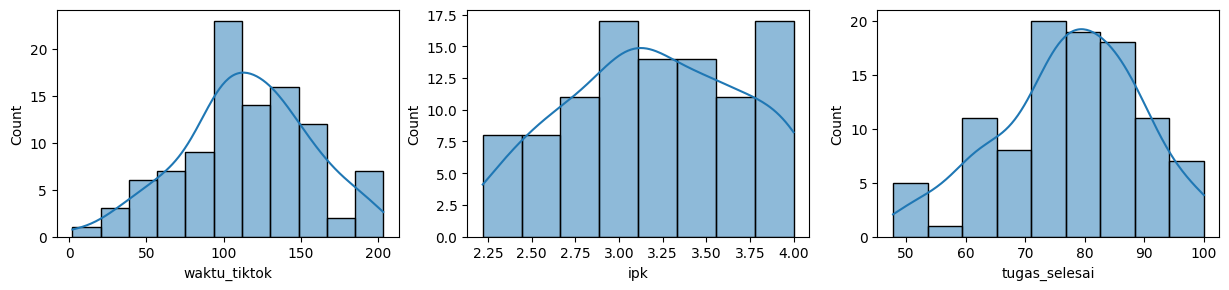

In [65]:
#atur size dari figure
plt.figure(figsize=(15,10)) #kolom dan baris

for posisi, nama_kolom in zip(range(1,10), numerik.columns):
    plt.subplot(3,3,posisi)
    sns.histplot(df[nama_kolom], kde = True)

plt.show()

# Uji Normalitas Variabel Numerik

In [ ]:
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import normaltest

# Asumsikan df adalah DataFrame yang sudah ada
numerik = df.select_dtypes(include='number')

# Untuk menyimpan hasil
results = []

print("H0 = Data berdistribusi normal")
print("H1 = Data tidak berdistribusi normal")

for kolom in numerik.columns:
    # Kolmogorov-Smirnov Test
    ks_stat, ks_pval = kstest(df[kolom], 'norm')

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_pval = shapiro(df[kolom])

    # Lilliefors Test
    lilliefors_stat, lilliefors_pval = lilliefors(df[kolom])

    # D'Agustino Pearson Test
    normaltest_stat, normaltest_pval = normaltest(df[kolom])

    # Menentukan hasil
    results.append({
        'Kolom': kolom,
        'KS_p-value': ks_pval,
        'Shapiro_p-value': shapiro_pval,
        'Pearson_p-value': normaltest_pval,
        'Lilliefors_p-value': lilliefors_pval,
        'KS_Result': 'Tolak H0' if ks_pval < 0.05 else 'Gagal Menolak H0',
        'Shapiro_Result': 'Tolak H0' if shapiro_pval < 0.05 else 'Gagal Menolak H0',
        'Lilliefors_Result': 'Tolak H0' if lilliefors_pval < 0.05 else 'Gagal Menolak H0',
        'Pearson_Result': 'Tolak H0' if normaltest_pval < 0.05 else 'Gagal Menolak H0'
    })

# Mengubah hasil menjadi DataFrame
results_df = pd.DataFrame(results)

# Tampilkan hasil
results_df

H0 = Data berdistribusi normal
H1 = Data tidak berdistribusi normal


,Kolom,KS_p-value,Shapiro_p-value,Pearson_p-value,Lilliefors_p-value,KS_Result,Shapiro_Result,Lilliefors_Result,Pearson_Result
0,waktu_tiktok,2.000000e-200,0.657179,0.750598,0.742595,Tolak H0,Gagal Menolak H0,Gagal Menolak H0,Gagal Menolak H0
1,ipk,2.450676e-188,0.006804,0.002999,0.539139,Tolak H0,Tolak H0,Gagal Menolak H0,Tolak H0
2,tugas_selesai,0.000000e+00,0.120636,0.311187,0.177463,Tolak H0,Gagal Menolak H0,Gagal Menolak H0,Gagal Menolak H0


# Cek Outliers

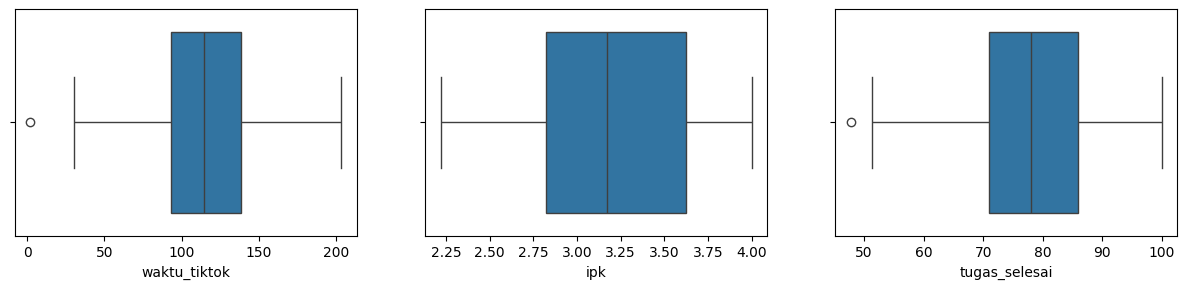

In [67]:
# atur size dari figure
plt.figure(figsize = (15,10)) # kolom, baris

for posisi, nama_kolom in zip(range(1,10), numerik.columns): # posisi 1 sampai 9
    plt.subplot(3,3,posisi) # jumlah baris, jumlah kolom, posisi
    sns.boxplot(x = df[nama_kolom])

plt.show()

In [68]:
for nama_kolom in numerik.columns:
    q1 = df[nama_kolom].quantile(0.25)
    q3 = df[nama_kolom].quantile(0.75)
    iqr = q3 - q1
    bebas_atas = q3 + (iqr * 1.5)
    bebas_bawah = q1 - (iqr * 1.5)
    jumlah_outliers = len(df[(df[nama_kolom] > bebas_atas) | (df[nama_kolom] < bebas_bawah)])
    print(f'Jumlah outliers: {nama_kolom} {jumlah_outliers}')

Jumlah outliers: waktu_tiktok 1
Jumlah outliers: ipk 0
Jumlah outliers: tugas_selesai 1


In [69]:
import pandas as pd

# Asumsikan df adalah DataFrame yang sudah ada
numerik = df.select_dtypes(include='number')

# List untuk menyimpan hasil
outlier_results = []

# Loop untuk menghitung outlier pada setiap kolom numerik
for nama_kolom in numerik.columns:
    q1 = df[nama_kolom].quantile(0.25)
    q3 = df[nama_kolom].quantile(0.75)
    iqr = q3 - q1
    bebas_atas = q3 + (iqr * 1.5)
    bebas_bawah = q1 - (iqr * 1.5)
    
    jumlah_outliers = len(df[(df[nama_kolom] > bebas_atas) | (df[nama_kolom] < bebas_bawah)])
    
    # Simpan hasil dalam list
    outlier_results.append({
        'Kolom': nama_kolom,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'Batas Bawah': bebas_bawah,
        'Batas Atas': bebas_atas,
        'Jumlah Outliers': jumlah_outliers
    })

# Ubah list menjadi DataFrame
outlier_df = pd.DataFrame(outlier_results)

# Tampilkan DataFrame hasil
outlier_df

,Kolom,Q1,Q3,IQR,Batas Bawah,Batas Atas,Jumlah Outliers
0,waktu_tiktok,92.975,138.2750,45.3000,25.02500,206.22500,1
1,ipk,2.825,3.6225,0.7975,1.62875,4.81875,0
2,tugas_selesai,70.950,85.9000,14.9500,48.52500,108.32500,1


# Korelasi

In [70]:
numerik.corr()

,waktu_tiktok,ipk,tugas_selesai
waktu_tiktok,1.000000,-0.556019,-0.514185
ipk,-0.556019,1.000000,0.251817
tugas_selesai,-0.514185,0.251817,1.000000


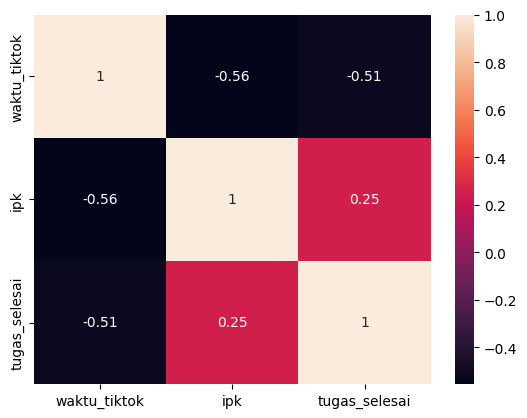

In [71]:
sns.heatmap(numerik.corr(), annot = True)
plt.show()

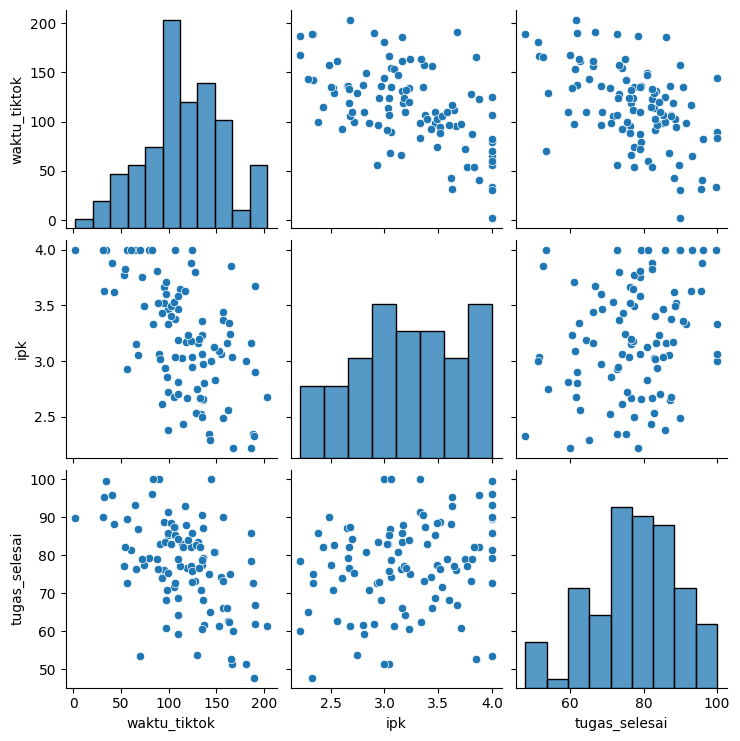

In [72]:
sns.pairplot(numerik)
plt.savefig('pairplot.png')

# Mean

C:\Users\tuf\AppData\Local\Temp\ipykernel_24380\3025129268.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='kategori_waktu_tiktok', y='ipk', data=df_rata, palette='viridis')


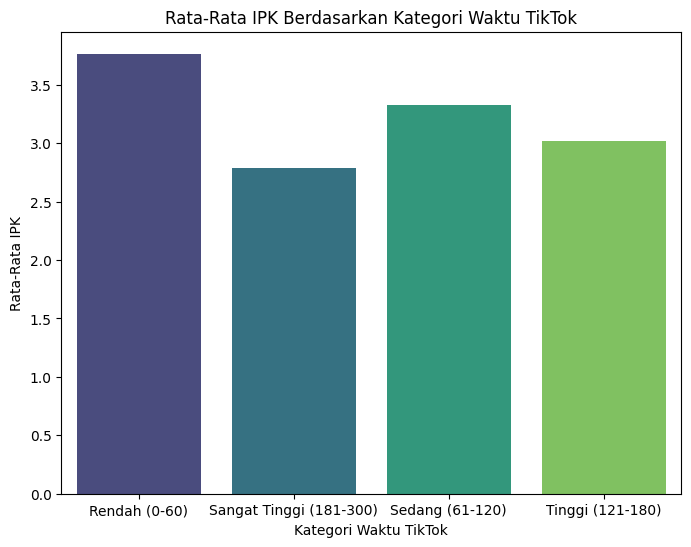

In [81]:
# Menghitung rata-rata IPK untuk setiap kategori
df_rata = df.groupby('kategori_waktu_tiktok', as_index=False)['ipk'].mean()

# Membuat bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='kategori_waktu_tiktok', y='ipk', data=df_rata, palette='viridis')
plt.title('Rata-Rata IPK Berdasarkan Kategori Waktu TikTok')
plt.xlabel('Kategori Waktu TikTok')
plt.ylabel('Rata-Rata IPK')
plt.show()

C:\Users\tuf\AppData\Local\Temp\ipykernel_24380\2823714102.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='kategori_waktu_tiktok', y='tugas_selesai', data=df_rata, palette='viridis')


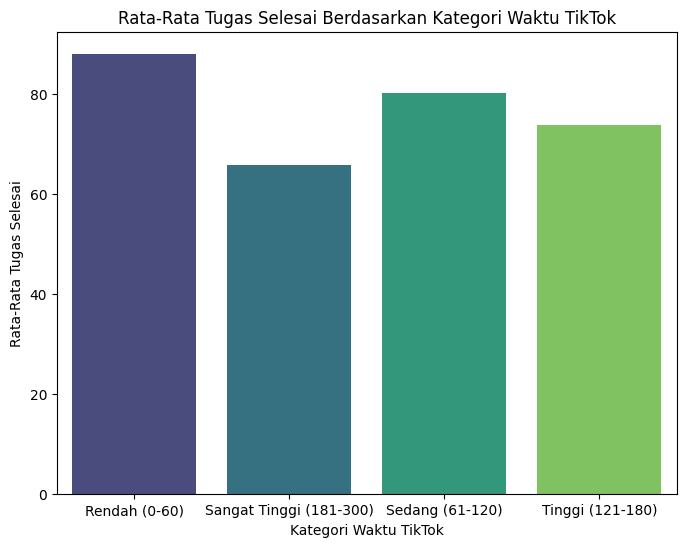

In [82]:
# Menghitung rata-rata tugas selesai untuk setiap kategori
df_rata = df.groupby('kategori_waktu_tiktok', as_index=False)['tugas_selesai'].mean()

# Membuat bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='kategori_waktu_tiktok', y='tugas_selesai', data=df_rata, palette='viridis')
plt.title('Rata-Rata Tugas Selesai Berdasarkan Kategori Waktu TikTok')
plt.xlabel('Kategori Waktu TikTok')
plt.ylabel('Rata-Rata Tugas Selesai')
plt.show()

# Uji Statistika Chi-Square

In [ ]:
from scipy.stats import f_oneway

H0 = 'Tidak ada perbedaan signifikan dalam rata-rata IPK mahasiswa antara kategori waktu TikTok'
Ha = 'Terdapat perbedaan signifikan dalam rata-rata IPK mahasiswa antara kategori waktu TikTok'

kategori_rendah = df[df['kategori_waktu_tiktok'] == 'Rendah (0-60)']['ipk']
kategori_sedang = df[df['kategori_waktu_tiktok'] == 'Sedang (61-120)']['ipk']
kategori_tinggi = df[df['kategori_waktu_tiktok'] == 'Tinggi (121-180)']['ipk']
kategori_sangat_tinggi = df[df['kategori_waktu_tiktok'] == 'Sangat Tinggi (181-300)']['ipk']

stats, pval = f_oneway(kategori_rendah, kategori_sedang, kategori_tinggi, kategori_sangat_tinggi)
print('P-Value: ', pval)
print('f-Score: ', stats)

# Interpretasi hasil
if pval < 0.05:
    print(f"H0 ditolak. {Ha}")
else:
    print(f"H0 gagal ditolak. {H0}")

P-Value:  2.5204625986629595e-06
f-Score:  11.11050312848609
H0 ditolak. Terdapat perbedaan signifikan dalam rata-rata IPK mahasiswa antara kategori waktu TikTok


In [83]:
from scipy.stats import f_oneway

H0 = 'Tidak ada perbedaan signifikan dalam rata-rata tugas selesai mahasiswa antara kategori waktu TikTok'
Ha = 'Terdapat perbedaan signifikan dalam rata-rata tugas selesai mahasiswa antara kategori waktu TikTok'

kategori_rendah = df[df['kategori_waktu_tiktok'] == 'Rendah (0-60)']['tugas_selesai']
kategori_sedang = df[df['kategori_waktu_tiktok'] == 'Sedang (61-120)']['tugas_selesai']
kategori_tinggi = df[df['kategori_waktu_tiktok'] == 'Tinggi (121-180)']['tugas_selesai']
kategori_sangat_tinggi = df[df['kategori_waktu_tiktok'] == 'Sangat Tinggi (181-300)']['tugas_selesai']

stats, pval = f_oneway(kategori_rendah, kategori_sedang, kategori_tinggi, kategori_sangat_tinggi)
print('P-Value: ', pval)
print('f-Score: ', stats)

# Interpretasi hasil
if pval < 0.05:
    print(f"H0 ditolak. {Ha}")
else:
    print(f"H0 gagal ditolak. {H0}")

P-Value:  2.7581007658966688e-05
f-Score:  8.94938221114127
H0 ditolak. Terdapat perbedaan signifikan dalam rata-rata tugas selesai mahasiswa antara kategori waktu TikTok


# Variabel Kategorik

#### Proporsi Kesulitas Tidur Berdasarkan Kategorik Waktu Tiktok

In [120]:
# Menghitung frekuensi
df_freq = df.groupby(['kategori_waktu_tiktok', 'kesulitan_tidur']).size().reset_index(name='Jumlah')
print(df_freq)

      kategori_waktu_tiktok kesulitan_tidur  Jumlah
0             Rendah (0-60)          Ringan       3
1             Rendah (0-60)           Tidak       7
2   Sangat Tinggi (181-300)           Parah       1
3   Sangat Tinggi (181-300)          Ringan       1
4   Sangat Tinggi (181-300)          Sedang       6
5           Sedang (61-120)           Parah       6
6           Sedang (61-120)          Ringan      18
7           Sedang (61-120)          Sedang       4
8           Sedang (61-120)           Tidak      16
9          Tinggi (121-180)           Parah       8
10         Tinggi (121-180)          Ringan       3
11         Tinggi (121-180)          Sedang      17
12         Tinggi (121-180)           Tidak      10


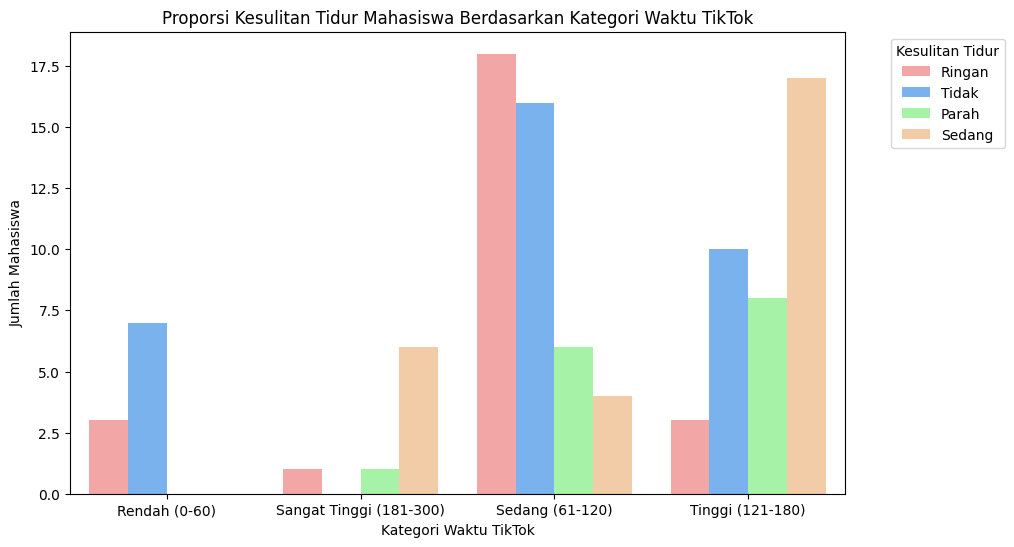

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar warna kustom
custom_palette = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Membuat bar plot dengan palet warna kustom
plt.figure(figsize=(10, 6))
sns.barplot(x='kategori_waktu_tiktok', y='Jumlah', hue='kesulitan_tidur', data=df_freq, palette=custom_palette)
plt.title('Proporsi Kesulitan Tidur Mahasiswa Berdasarkan Kategori Waktu TikTok')
plt.xlabel('Kategori Waktu TikTok')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Kesulitan Tidur', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [122]:

from scipy.stats import chi2_contingency

H0 = "Tidak ada perbedaan signifikan antara kategori waktu tiktok dengan Kesulitan Tidur"
Ha = "Terdapat perbedaan signifikan antara kategori waktu tiktok dengan Kesulitan Tidur"

contingency_table = pd.crosstab(df['kategori_waktu_tiktok'], df['kesulitan_tidur'])
chi2_contingency(contingency_table)

stat, pval, dof, expected = chi2_contingency(contingency_table)
print('Chi - Square: ', stat)
print('P-Value: ', pval)
print('dof: ', dof)
print('expected: ', expected)

if pval < 0.05:
    print(f'Tolak H0: {Ha}')
else:
    print(f'Gagal Menolak H0: {H0}')

Chi - Square:  38.65279267958694
P-Value:  1.330528823675506e-05
dof:  9
expected:  [[ 1.5   2.5   2.7   3.3 ]
 [ 1.2   2.    2.16  2.64]
 [ 6.6  11.   11.88 14.52]
 [ 5.7   9.5  10.26 12.54]]
Tolak H0: Terdapat perbedaan signifikan antara kategori waktu tiktok dengan Kesulitan Tidur


#### Proporsi Jurusan Berdasarkan Kategorik Waktu Tiktok

In [112]:
# Menghitung frekuensi
df_freq = df.groupby(['kategori_waktu_tiktok', 'jurusan']).size().reset_index(name='Jumlah')
print(df_freq)

      kategori_waktu_tiktok             jurusan  Jumlah
0             Rendah (0-60)             Ekonomi       2
1             Rendah (0-60)               Hukum       2
2             Rendah (0-60)          Kedokteran       1
3             Rendah (0-60)           Psikologi       3
4             Rendah (0-60)  Teknik Informatika       2
5   Sangat Tinggi (181-300)             Ekonomi       3
6   Sangat Tinggi (181-300)          Kedokteran       1
7   Sangat Tinggi (181-300)           Psikologi       1
8   Sangat Tinggi (181-300)  Teknik Informatika       3
9           Sedang (61-120)             Ekonomi      10
10          Sedang (61-120)               Hukum       6
11          Sedang (61-120)          Kedokteran       4
12          Sedang (61-120)           Psikologi       8
13          Sedang (61-120)  Teknik Informatika      16
14         Tinggi (121-180)             Ekonomi      10
15         Tinggi (121-180)               Hukum       4
16         Tinggi (121-180)          Kedokteran 

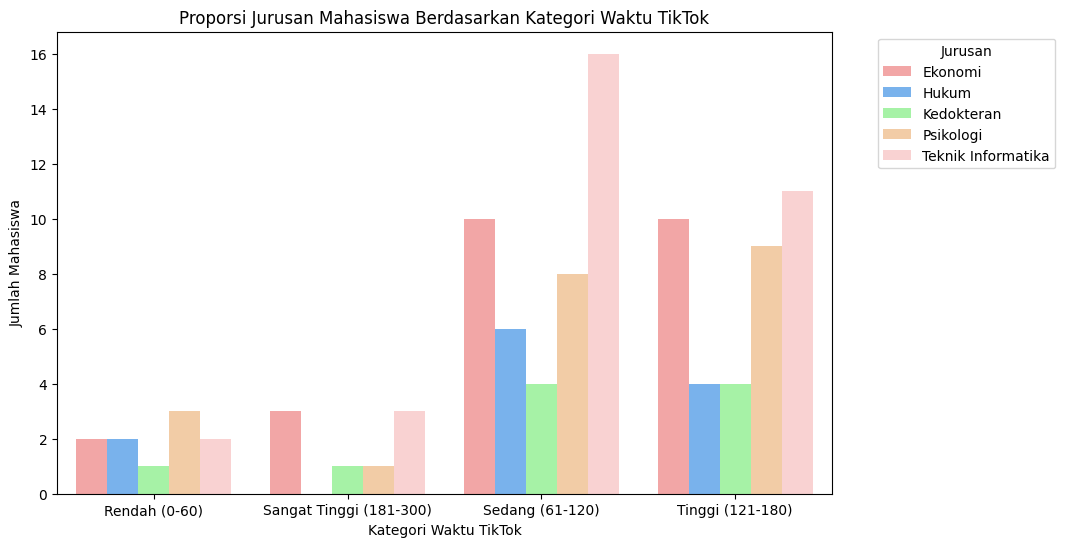

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar warna kustom
custom_palette = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFCCCC']

# Membuat bar plot dengan palet warna kustom
plt.figure(figsize=(10, 6))
sns.barplot(x='kategori_waktu_tiktok', y='Jumlah', hue='jurusan', data=df_freq, palette=custom_palette)
plt.title('Proporsi Jurusan Mahasiswa Berdasarkan Kategori Waktu TikTok')
plt.xlabel('Kategori Waktu TikTok')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Jurusan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [119]:

from scipy.stats import chi2_contingency

H0 = "Tidak ada perbedaan signifikan antara kategori waktu tiktok dengan Jurusan"
Ha = "Terdapat perbedaan signifikan antara kategori waktu tiktok dengan Jurusan"

contingency_table = pd.crosstab(df['kategori_waktu_tiktok'], df['jurusan'])
chi2_contingency(contingency_table)

stat, pval, dof, expected = chi2_contingency(contingency_table)
print('Chi - Square: ', stat)
print('P-Value: ', pval)
print('dof: ', dof)
print('expected: ', expected)

if pval < 0.05:
    print(f'Tolak H0: {Ha}')
else:
    print(f'Gagal Menolak H0: {H0}')

Chi - Square:  4.330238237639552
P-Value:  0.9767134672341642
dof:  12
expected:  [[ 2.5   1.2   1.    2.1   3.2 ]
 [ 2.    0.96  0.8   1.68  2.56]
 [11.    5.28  4.4   9.24 14.08]
 [ 9.5   4.56  3.8   7.98 12.16]]
Gagal Menolak H0: Tidak ada perbedaan signifikan antara kategori waktu tiktok dengan Jurusan


#### Proporsi Waktu Akses Berdasarkan Kategorik Waktu Tiktok

In [116]:
# Menghitung frekuensi
df_freq = df.groupby(['kategori_waktu_tiktok', 'waktu_akses']).size().reset_index(name='Jumlah')
print(df_freq)

      kategori_waktu_tiktok waktu_akses  Jumlah
0             Rendah (0-60)       Malam       2
1             Rendah (0-60)        Pagi       3
2             Rendah (0-60)       Siang       5
3   Sangat Tinggi (181-300)       Malam       3
4   Sangat Tinggi (181-300)        Pagi       3
5   Sangat Tinggi (181-300)       Siang       2
6           Sedang (61-120)       Malam       6
7           Sedang (61-120)        Pagi      11
8           Sedang (61-120)       Siang      27
9          Tinggi (121-180)       Malam      12
10         Tinggi (121-180)        Pagi      10
11         Tinggi (121-180)       Siang      16


C:\Users\tuf\AppData\Local\Temp\ipykernel_24380\3373920086.py:9: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x='kategori_waktu_tiktok', y='Jumlah', hue='waktu_akses', data=df_freq, palette=custom_palette)


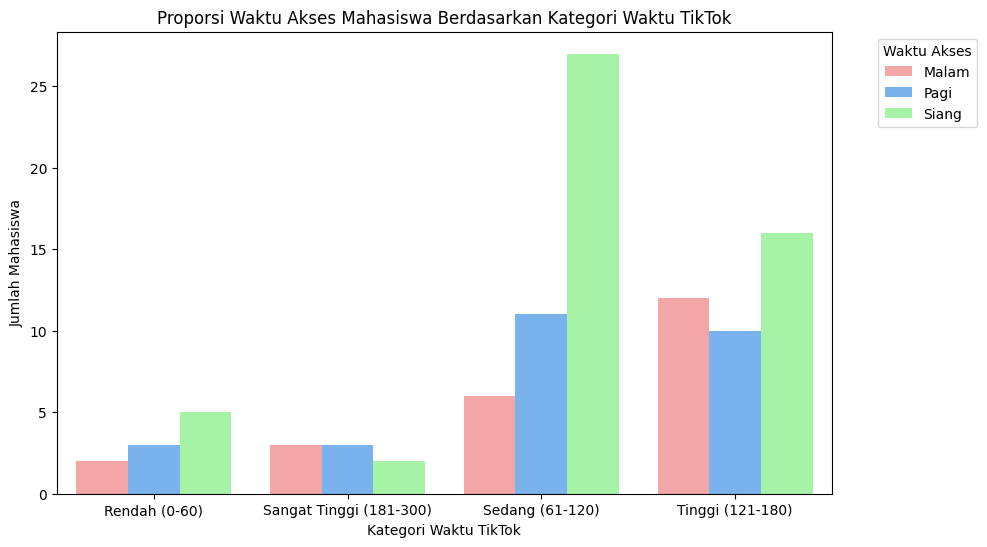

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar warna kustom
custom_palette = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Membuat bar plot dengan palet warna kustom
plt.figure(figsize=(10, 6))
sns.barplot(x='kategori_waktu_tiktok', y='Jumlah', hue='waktu_akses', data=df_freq, palette=custom_palette)
plt.title('Proporsi Waktu Akses Mahasiswa Berdasarkan Kategori Waktu TikTok')
plt.xlabel('Kategori Waktu TikTok')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Waktu Akses', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [118]:

from scipy.stats import chi2_contingency

H0 = "Tidak ada perbedaan signifikan antara kategori waktu tiktok dengan waktu akses"
Ha = "Terdapat perbedaan signifikan antara kategori waktu tiktok dengan waktu akses"

contingency_table = pd.crosstab(df['kategori_waktu_tiktok'], df['waktu_akses'])
chi2_contingency(contingency_table)

stat, pval, dof, expected = chi2_contingency(contingency_table)
print('Chi - Square: ', stat)
print('P-Value: ', pval)
print('dof: ', dof)
print('expected: ', expected)

if pval < 0.05:
    print(f'Tolak H0: {Ha}')
else:
    print(f'Gagal Menolak H0: {H0}')

Chi - Square:  6.70554130165114
P-Value:  0.3489388768606947
dof:  6
expected:  [[ 2.3   2.7   5.  ]
 [ 1.84  2.16  4.  ]
 [10.12 11.88 22.  ]
 [ 8.74 10.26 19.  ]]
Gagal Menolak H0: Tidak ada perbedaan signifikan antara kategori waktu tiktok dengan waktu akses


#### Proporsi Tipe Konten Berdasarkan Kategorik Waktu Tiktok

In [114]:
# Menghitung frekuensi
df_freq = df.groupby(['kategori_waktu_tiktok', 'tipe_konten']).size().reset_index(name='Jumlah')
print(df_freq)

      kategori_waktu_tiktok    tipe_konten  Jumlah
0             Rendah (0-60)       Edukatif       9
1             Rendah (0-60)  Entertainment       1
2   Sangat Tinggi (181-300)       Edukatif       4
3   Sangat Tinggi (181-300)  Entertainment       2
4   Sangat Tinggi (181-300)        Hiburan       2
5           Sedang (61-120)       Edukatif      26
6           Sedang (61-120)  Entertainment       7
7           Sedang (61-120)        Hiburan      11
8          Tinggi (121-180)       Edukatif      11
9          Tinggi (121-180)  Entertainment      12
10         Tinggi (121-180)        Hiburan      15


C:\Users\tuf\AppData\Local\Temp\ipykernel_24380\4101423095.py:9: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x='kategori_waktu_tiktok', y='Jumlah', hue='tipe_konten', data=df_freq, palette=custom_palette)


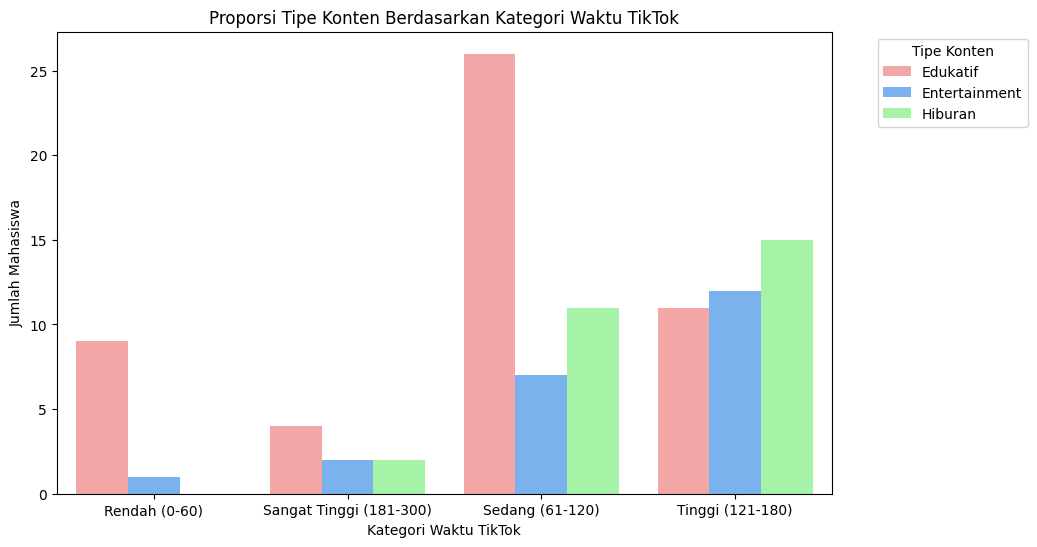

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar warna kustom
custom_palette = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF66FF']

# Membuat bar plot dengan palet warna kustom
plt.figure(figsize=(10, 6))
sns.barplot(x='kategori_waktu_tiktok', y='Jumlah', hue='tipe_konten', data=df_freq, palette=custom_palette)
plt.title('Proporsi Tipe Konten Berdasarkan Kategori Waktu TikTok')
plt.xlabel('Kategori Waktu TikTok')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Tipe Konten', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [105]:

from scipy.stats import chi2_contingency

H0 = "Tidak ada perbedaan signifikan antara kategori waktu tiktok dengan tipe konten"
Ha = "Terdapat perbedaan signifikan antara kategori waktu tiktok dengan tipe konten"

contingency_table = pd.crosstab(df['kategori_waktu_tiktok'], df['tipe_konten'])
chi2_contingency(contingency_table)

stat, pval, dof, expected = chi2_contingency(contingency_table)
print('Chi - Square: ', stat)
print('P-Value: ', pval)
print('dof: ', dof)
print('expected: ', expected)

if pval < 0.05:
    print(f'Tolak H0: {Ha}')
else:
    print(f'Terima H0: {H0}')

Chi - Square:  15.063589759522774
P-Value:  0.01976785415775302
dof:  6
expected:  [[ 5.    2.2   2.8 ]
 [ 4.    1.76  2.24]
 [22.    9.68 12.32]
 [19.    8.36 10.64]]
Tolak H0: Terdapat perbedaan signifikan antara kategori waktu tiktok dengan tipe konten


In [73]:
kategorik = df.select_dtypes(include = 'object') # sama saja
kategorik

,kesulitan_tidur,jenis_kelamin,jurusan,waktu_akses,tipe_konten,tempat_tinggal,kategori_waktu_tiktok
0,Ringan,Laki-laki,Kedokteran,Siang,Entertainment,Kost,Tinggi (121-180)
1,Tidak,Laki-laki,Teknik Informatika,Malam,Hiburan,Asrama,Sedang (61-120)
2,Sedang,Perempuan,Ekonomi,Siang,Hiburan,Kost,Tinggi (121-180)
3,Parah,Perempuan,Teknik Informatika,Siang,Entertainment,Rumah,Sangat Tinggi (181-300)
4,Parah,Perempuan,Hukum,Siang,Edukatif,Kost,Sedang (61-120)
...,...,...,...,...,...,...,...
95,Tidak,Laki-laki,Hukum,Pagi,Entertainment,Rumah,Rendah (0-60)
96,Ringan,Laki-laki,Psikologi,Pagi,Entertainment,Kost,Tinggi (121-180)
97,Sedang,Laki-laki,Psikologi,Pagi,Hiburan,Kost,Tinggi (121-180)
98,Sedang,Laki-laki,Teknik Informatika,Siang,Edukatif,Kost,Tinggi (121-180)


In [74]:
kategorik.describe()

,kesulitan_tidur,jenis_kelamin,jurusan,waktu_akses,tipe_konten,tempat_tinggal,kategori_waktu_tiktok
count,100,100,100,100,100,100,100
unique,4,2,5,3,3,3,4
top,Tidak,Laki-laki,Teknik Informatika,Siang,Edukatif,Kost,Sedang (61-120)
freq,33,53,32,50,50,48,44


In [75]:
kategorik.nunique()

kesulitan_tidur          4
jenis_kelamin            2
jurusan                  5
waktu_akses              3
tipe_konten              3
tempat_tinggal           3
kategori_waktu_tiktok    4
dtype: int64